In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import pandas as pd

# Load each dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('validation.csv')

# Concatenate them into a single DataFrame
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# (Optional) Shuffle the merged data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the result
print(df.shape)
print(df.head())



(7043, 52)
   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   50                        5                              41.38   
1   54                       10                              24.17   
2   35                        0                              34.79   
3   57                       18                              20.67   
4   31                        0                              22.12   

  Churn Category                  Churn Reason  Churn Score         City  \
0            NaN                           NaN           68  Wilseyville   
1            NaN                           NaN           47    Newcastle   
2     Competitor  Competitor made better offer           84      Bolinas   
3            NaN                           NaN           80       Upland   
4          Price         Long distance charges           92       Kyburz   

   CLTV        Contract        Country  ... Tenure in Months Total Charges  \
0  3167  Month-to-Month  United S

In [93]:
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,50,5,41.38,NaN,NaN,68,Wilseyville,3167,Month-to-Month,United States,...,3,140.4,0,124.14,0.0,264.54,0,1,95257,0
1,54,10,24.17,NaN,NaN,47,Newcastle,3351,Month-to-Month,United States,...,15,1108.6,90,362.55,0.0,1561.15,0,0,95658,0
2,35,0,34.79,Competitor,Competitor made better offer,84,Bolinas,5890,Month-to-Month,United States,...,1,19.1,0,34.79,0.0,53.89,0,0,94924,1
3,57,18,20.67,NaN,NaN,80,Upland,5413,Month-to-Month,United States,...,8,658.1,0,165.36,0.0,823.46,0,1,91784,0
4,31,0,22.12,Price,Long distance charges,92,Kyburz,3663,Month-to-Month,United States,...,1,20.4,0,22.12,0.0,42.52,0,0,95720,1


In [94]:

df.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       5174
Churn Reason                         5174
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn Category                     1869 non-null   object 
 4   Churn Reason                       1869 non-null   object 
 5   Churn Score                        7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   CLTV                               7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Country                            7043 non-null   object 
 10  Customer ID                        7043 non-null   object 
 11  Customer Status                    7043 non-null   objec

In [96]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [97]:
df.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,20.515405,22.958954,58.505040,4400.295755,0.231010,0.343888,0.783331,36.197455,-119.756684,...,32.386767,2280.381264,6.860713,749.099262,1.962182,3034.379056,0.198921,0.673719,93486.070567,0.265370
std,16.750352,20.418940,15.448113,21.170031,1183.057152,0.421508,0.475038,0.412004,2.468929,2.154425,...,24.542061,2266.220462,25.104978,846.660055,7.902614,2865.204542,0.399217,0.468885,1856.767505,0.441561
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,3.000000,9.210000,40.000000,3469.000000,0.000000,0.000000,1.000000,33.990646,-121.788090,...,9.000000,400.150000,0.000000,70.545000,0.000000,605.610000,0.000000,0.000000,92101.000000,0.000000
50%,46.000000,17.000000,22.890000,61.000000,4527.000000,0.000000,0.000000,1.000000,36.205465,-119.595293,...,29.000000,1394.550000,0.000000,401.440000,0.000000,2108.640000,0.000000,1.000000,93518.000000,0.000000
75%,60.000000,27.000000,36.395000,75.500000,5380.500000,0.000000,1.000000,1.000000,38.161321,-117.969795,...,55.000000,3786.600000,0.000000,1191.100000,0.000000,4801.145000,0.000000,1.000000,95329.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8684.800000,150.000000,3564.720000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


In [98]:
df.shape

(7043, 52)

In [99]:
df.drop(columns=['Customer ID',"Churn Category","Churn Reason","Latitude","Longitude","Zip Code"], inplace=True)

In [100]:
df["Offer"].unique()

array([nan, 'Offer D', 'Offer E', 'Offer C', 'Offer A', 'Offer B'],
      dtype=object)

In [101]:
df["Offer"].fillna("No Offer", inplace=True)

/var/folders/_m/hqmcmzq911bcxwqss422p6zr0000gn/T/ipykernel_79476/2381727791.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Offer"].fillna("No Offer", inplace=True)


In [102]:
df["Internet Type"].unique()

array(['DSL', 'Fiber Optic', nan, 'Cable'], dtype=object)

In [103]:
import pandas as pd

# Frequency table (counts)
ct_counts = pd.crosstab(df['Internet Service'], df['Churn'])
print(ct_counts)

# Row-wise percentages
ct_row_pct = pd.crosstab(df['Internet Service'],df['Churn'],normalize='index') * 100
print(ct_row_pct.round(1))


Churn                0     1
Internet Service            
0                 1413   113
1                 3761  1756
Churn                0     1
Internet Service            
0                 92.6   7.4
1                 68.2  31.8


Contract       Month-to-Month  One Year  Two Year
Internet Type                                    
Cable                    44.2      12.0       1.4
DSL                      33.3       8.9       2.0
Fiber Optic              58.8      16.7       5.5


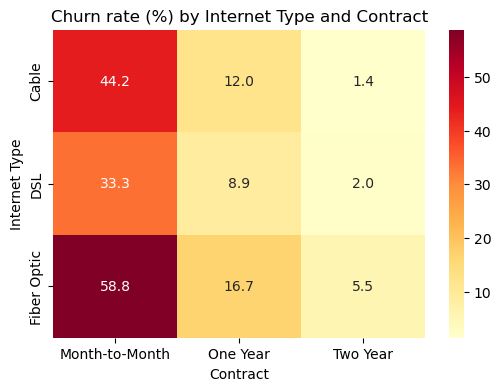

In [104]:
# First create a combined table of counts
table = pd.crosstab(index=df['Internet Type'],columns=df['Contract'],values=df['Churn'],aggfunc='mean')   # mean of 0/1 == churn rate
print((table*100).round(1))           # convert to %

# Optional: visual heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(table*100, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Churn rate (%) by Internet Type and Contract')
plt.ylabel('Internet Type')
plt.xlabel('Contract')
plt.show()


In [105]:
tenure_summary = df.pivot_table(index='Internet Type',columns='Churn',values='Tenure in Months',aggfunc='mean')
print(tenure_summary.round(1))


Churn             0     1
Internet Type            
Cable          37.5  16.0
DSL            37.1  14.3
Fiber Optic    42.1  20.1


In [106]:
df['Tenure Band'] = pd.cut(df['Tenure in Months'],bins=[0,12,24,48,72,96],labels=['<12','12-24','24-48','48-72','72+'])

tenure_band_tab = pd.crosstab(df['Internet Type'],df['Tenure Band'])
print(tenure_band_tab)


Tenure Band    <12  12-24  24-48  48-72
Internet Type                          
Cable          276    107    188    259
DSL            502    242    371    537
Fiber Optic    895    436    698   1006


In [107]:
mask_no_service = df['Internet Service'] == 0
df.loc[mask_no_service, 'Internet Type'] = 'No Internet'


In [108]:
df.isnull().sum()

Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
Churn Score                          0
City                                 0
CLTV                                 0
Contract                             0
Country                              0
Customer Status                      0
Dependents                           0
Device Protection Plan               0
Gender                               0
Internet Service                     0
Internet Type                        0
Lat Long                             0
Married                              0
Monthly Charge                       0
Multiple Lines                       0
Number of Dependents                 0
Number of Referrals                  0
Offer                                0
Online Backup                        0
Online Security                      0
Paperless Billing                    0
Partner                              0
Payment Method           

In [109]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Text(0, 0.5, '% within contract')

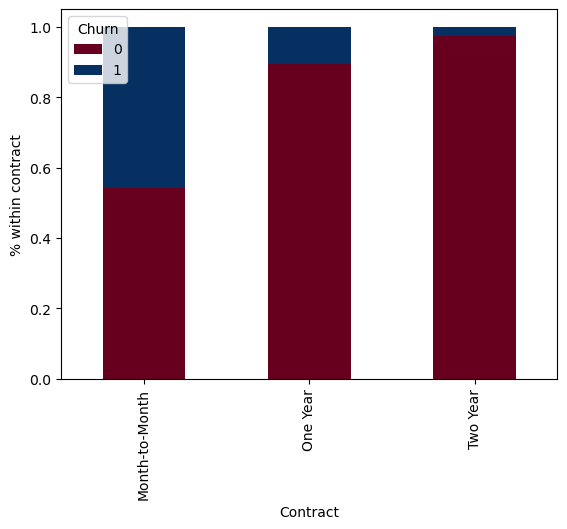

In [110]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')\
    .plot(kind='bar', stacked=True, colormap='RdBu')
plt.ylabel('% within contract')


<Axes: xlabel='Contract', ylabel='Internet Type'>

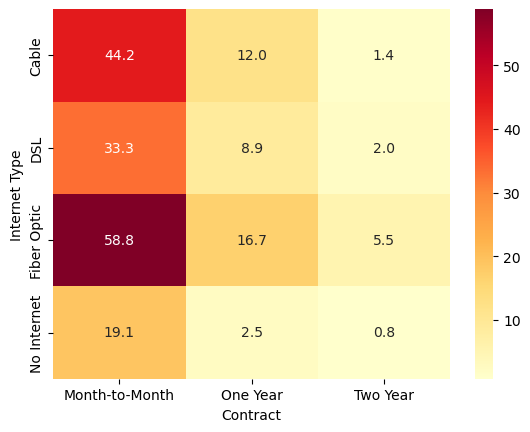

In [111]:
sns.heatmap(
    pd.crosstab(df['Internet Type'], df['Contract'],
                values=df['Churn'], aggfunc='mean')*100,
    annot=True, fmt='.1f', cmap='YlOrRd')


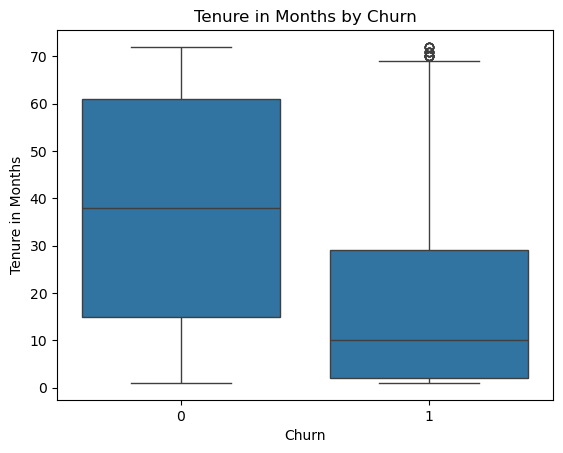

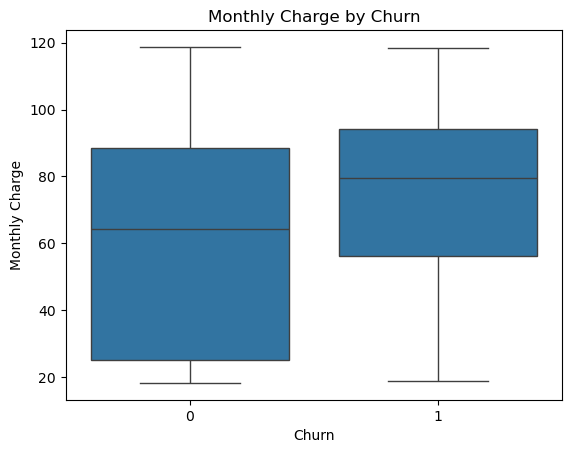

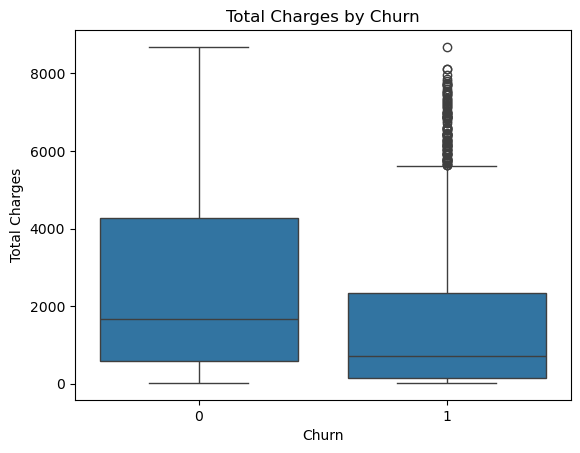

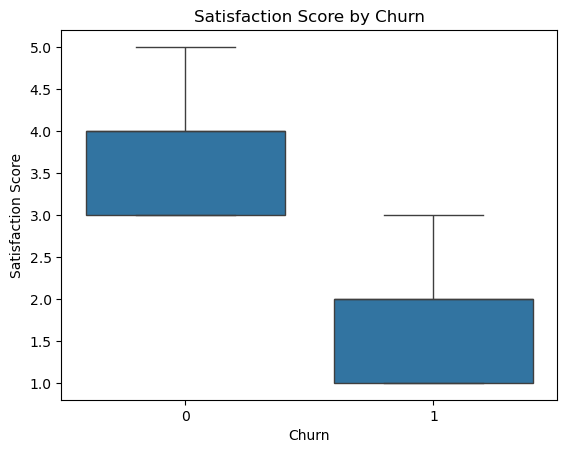

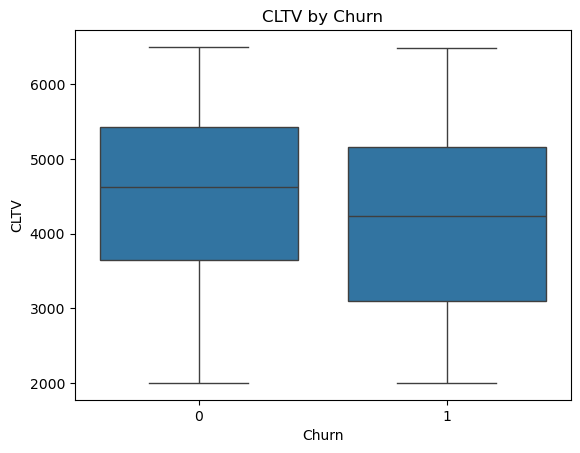

In [112]:
num_cols = ['Tenure in Months', 'Monthly Charge', 'Total Charges',
            'Satisfaction Score', 'CLTV']
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()


In [113]:
# Price-based features
df['Monthly_to_Total_Ratio'] = df['Monthly Charge'] / (df['Total Charges'] + 1)
df['Avg_Monthly_Spend'] = df['Total Charges'] / df['Tenure in Months']

# Tenure-based features  
df['Tenure_Quartile'] = pd.qcut(df['Tenure in Months'], 4, labels=['Q1','Q2','Q3','Q4'])
df['Early_Churner_Risk'] = (df['Tenure in Months'] < 12).astype(int)

# Satisfaction bins
df['Low_Satisfaction'] = (df['Satisfaction Score'] <= 2).astype(int)


In [114]:
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,City,CLTV,Contract,Country,Customer Status,Dependents,...,Total Revenue,Under 30,Unlimited Data,Churn,Tenure Band,Monthly_to_Total_Ratio,Avg_Monthly_Spend,Tenure_Quartile,Early_Churner_Risk,Low_Satisfaction
0,50,5,41.38,68,Wilseyville,3167,Month-to-Month,United States,Joined,0,...,264.54,0,1,0,<12,0.383310,46.800000,Q1,1,0
1,54,10,24.17,47,Newcastle,3351,Month-to-Month,United States,Stayed,0,...,1561.15,0,0,0,12-24,0.061824,73.906667,Q2,0,0
2,35,0,34.79,84,Bolinas,5890,Month-to-Month,United States,Churned,0,...,53.89,0,0,1,<12,0.950249,19.100000,Q1,1,1
3,57,18,20.67,80,Upland,5413,Month-to-Month,United States,Stayed,0,...,823.46,0,1,0,<12,0.113792,82.262500,Q1,1,0
4,31,0,22.12,92,Kyburz,3663,Month-to-Month,United States,Churned,0,...,42.52,0,0,1,<12,0.953271,20.400000,Q1,1,0


In [115]:
df["City"].nunique()

1106

In [116]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'City', 'CLTV', 'Contract', 'Country', 'Customer Status',
       'Dependents', 'Device Protection Plan', 'Gender', 'Internet Service',
       'Internet Type', 'Lat Long', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data', 'Churn',
       'Tenure Band', 'Monthly_to_Total_Ratio', 'Avg_Monthly_Spend',
       'Tenure_Quartile', 'Early_Churner_Risk', 'Low_Sa

In [117]:
df.drop(columns=['Customer Status','Churn Score', 'Lat Long', 'Country', 'City'], inplace=True)

In [118]:
num_cols = ['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges', 'CLTV', 'Monthly Charge', 'Population', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds', 'Total Revenue', 'Tenure in Months', 'Monthly_to_Total_Ratio', 'Avg_Monthly_Spend', 'Number of Dependents', 'Number of Referrals', 'Dependents']

In [119]:
bin_cols = ['Device Protection Plan', 'Internet Service', 'Married', 'Multiple Lines','Online Backup', 'Online Security', 'Paperless Billing', 'Partner','Phone Service', 'Premium Tech Support', 'Referred a Friend','Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV','Under 30', 'Unlimited Data', 'Early_Churner_Risk', 'Low_Satisfaction']

In [120]:
cat_cols = ['Contract', 'Internet Type', 'Offer', 'Payment Method', 'Gender', 'Quarter', 'State', 'Tenure_Quartile']

In [121]:
from sklearn. preprocessing import StandardScaler, OneHotEncoder

In [122]:
for col in cat_cols:
    print(f"number of uniques in {col} - {df[col].nunique()}" '\n'   f"and the uniques are {df[col].unique()}")

number of uniques in Contract - 3
and the uniques are ['Month-to-Month' 'Two Year' 'One Year']
number of uniques in Internet Type - 4
and the uniques are ['DSL' 'Fiber Optic' 'No Internet' 'Cable']
number of uniques in Offer - 6
and the uniques are ['No Offer' 'Offer D' 'Offer E' 'Offer C' 'Offer A' 'Offer B']
number of uniques in Payment Method - 3
and the uniques are ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
number of uniques in Gender - 2
and the uniques are ['Female' 'Male']
number of uniques in Quarter - 1
and the uniques are ['Q3']
number of uniques in State - 1
and the uniques are ['California']
number of uniques in Tenure_Quartile - 4
and the uniques are ['Q1', 'Q2', 'Q3', 'Q4']
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


In [123]:
df.drop(columns=['Quarter', 'State'], inplace=True)

In [124]:
df = pd.get_dummies(df, columns=['Contract', 'Internet Type', 'Offer', 'Payment Method'], drop_first=True)

In [125]:
# Binary encoding for gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Ordinal encoding for Tenure_Quartile
tenure_map = {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}
df['Tenure_Quartile'] = df['Tenure_Quartile'].map(tenure_map)


In [126]:
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,CLTV,Dependents,Device Protection Plan,Gender,Internet Service,Married,Monthly Charge,...,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Credit Card,Payment Method_Mailed Check
0,50,5,41.38,3167,0,0,0,1,0,54.2,...,True,False,False,False,False,False,False,False,False,False
1,54,10,24.17,3351,0,0,1,1,1,68.6,...,False,True,False,False,False,False,True,False,False,False
2,35,0,34.79,5890,0,0,0,0,0,19.1,...,False,False,True,False,False,False,False,False,True,False
3,57,18,20.67,5413,0,0,1,1,1,75.0,...,False,True,False,False,False,False,False,True,True,False
4,31,0,22.12,3663,0,0,0,0,0,20.4,...,False,False,True,False,False,False,False,True,False,True


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                7043 non-null   int64   
 1   Avg Monthly GB Download            7043 non-null   int64   
 2   Avg Monthly Long Distance Charges  7043 non-null   float64 
 3   CLTV                               7043 non-null   int64   
 4   Dependents                         7043 non-null   int64   
 5   Device Protection Plan             7043 non-null   int64   
 6   Gender                             7043 non-null   int64   
 7   Internet Service                   7043 non-null   int64   
 8   Married                            7043 non-null   int64   
 9   Monthly Charge                     7043 non-null   float64 
 10  Multiple Lines                     7043 non-null   int64   
 11  Number of Dependents               7043 non

In [128]:
# --- 1. convert bool → 0/1  ----------
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype('int8')

# --- 2. ordered categorical → codes ---
# Tenure Band
band_order = ['<12','12-24','24-48','48-72','72+']
df['Tenure Band'] = (
        df['Tenure Band']
          .cat.reorder_categories(band_order, ordered=True)
          .cat.codes                            # 0-4
          .astype('int8')
)

# Tenure_Quartile (already ordered Q1<Q2<Q3<Q4)
df['Tenure_Quartile'] = df['Tenure_Quartile'].cat.codes.astype('int8')


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   CLTV                               7043 non-null   int64  
 4   Dependents                         7043 non-null   int64  
 5   Device Protection Plan             7043 non-null   int64  
 6   Gender                             7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Married                            7043 non-null   int64  
 9   Monthly Charge                     7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Number of Dependents               7043 non-null   int64

In [130]:
df.drop(columns=['Tenure Band'], inplace=True)

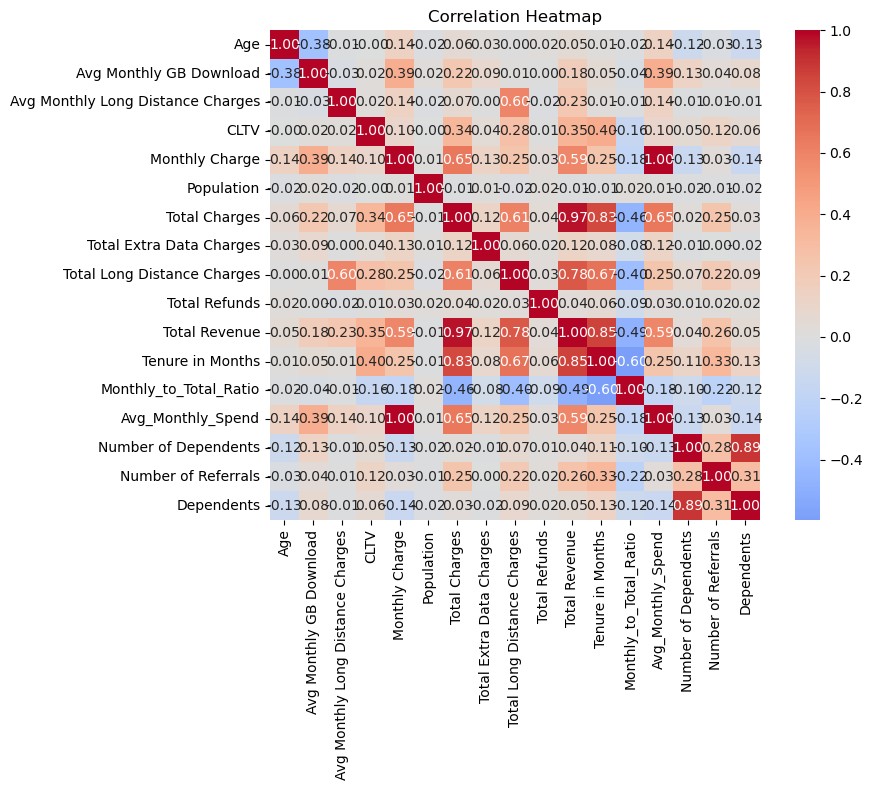

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [132]:
df.drop(columns=['Total Charges', 'Avg_Monthly_Spend', "Under 30"], inplace=True)  

In [133]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")

In [134]:
num_cols = ['Age', 'Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges', 'CLTV', 'Monthly_Charge', 'Population', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Refunds', 'Total_Revenue', 'Tenure_in_Months', 'Monthly_to_Total_Ratio', 'Number_of_Dependents', 'Number_of_Referrals', 'Dependents']

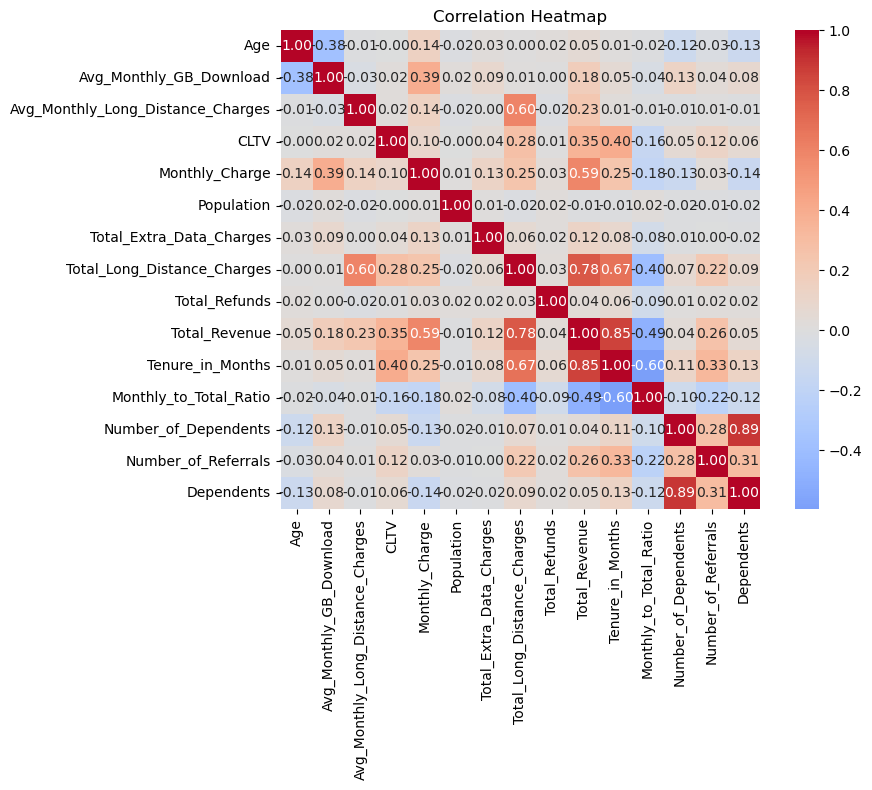

In [135]:
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [136]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [137]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit model on training data
log_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9666430092264017
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1035
           1       0.96      0.91      0.94       374

    accuracy                           0.97      1409
   macro avg       0.96      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Confusion Matrix:
 [[1021   14]
 [  33  341]]


In [139]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit model on training data
rf_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)
# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
from sklearn.metrics import accuracy_score
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9581263307310149
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1035
           1       0.98      0.86      0.92       374

    accuracy                           0.96      1409
   macro avg       0.97      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409

Random Forest Confusion Matrix:
 [[1029    6]
 [  53  321]]


In [140]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9602555003548616
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1035
           1       0.94      0.91      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

XGBoost Confusion Matrix:
 [[1014   21]
 [  35  339]]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:26:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [141]:
from sklearn.ensemble import VotingClassifier

# Create soft voting ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_model)],
    voting='soft'
)

# Fit on training data
voting_clf.fit(X_train, y_train)

# Predict or evaluate
y_pred_clf = voting_clf.predict(X_test)

# Predict or evaluate
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_clf))
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_clf))
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))


Voting Classifier Accuracy: 0.9673527324343506
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1035
           1       0.98      0.90      0.94       374

    accuracy                           0.97      1409
   macro avg       0.97      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Voting Classifier Confusion Matrix:
 [[1027    8]
 [  38  336]]


In [142]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit on training data
stacking_clf.fit(X_train, y_train)

# Predict or evaluate
y_pred_stack = stacking_clf.predict(X_test)

# Predict or evaluate
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Stacking Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))


Stacking Classifier Accuracy: 0.9694819020581973
Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1035
           1       0.97      0.92      0.94       374

    accuracy                           0.97      1409
   macro avg       0.97      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Stacking Classifier Confusion Matrix:
 [[1023   12]
 [  31  343]]


In [143]:
df.columns

Index(['Age', 'Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges',
       'CLTV', 'Dependents', 'Device_Protection_Plan', 'Gender',
       'Internet_Service', 'Married', 'Monthly_Charge', 'Multiple_Lines',
       'Number_of_Dependents', 'Number_of_Referrals', 'Online_Backup',
       'Online_Security', 'Paperless_Billing', 'Partner', 'Phone_Service',
       'Population', 'Premium_Tech_Support', 'Referred_a_Friend',
       'Satisfaction_Score', 'Senior_Citizen', 'Streaming_Movies',
       'Streaming_Music', 'Streaming_TV', 'Tenure_in_Months',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Refunds', 'Total_Revenue', 'Unlimited_Data', 'Churn',
       'Monthly_to_Total_Ratio', 'Tenure_Quartile', 'Early_Churner_Risk',
       'Low_Satisfaction', 'Contract_One_Year', 'Contract_Two_Year',
       'Internet_Type_DSL', 'Internet_Type_Fiber_Optic',
       'Internet_Type_No_Internet', 'Offer_Offer_A', 'Offer_Offer_B',
       'Offer_Offer_C', 'Offer_Offer_D

In [144]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
X_train_sample = X_train.head(500)
X_train_sample.to_csv('X_train_sample.csv', index=False)

In [145]:
# Save the model
joblib.dump(log_reg, 'log_reg.joblib')
print("Model saved as 'log_reg.joblib'")

joblib.dump(rf_model, 'rf_model.joblib')
print("Model saved as 'rf_model.joblib'")

joblib.dump(stacking_clf, 'stacking_clf.joblib')
print("Model saved as 'stacking_clf.joblib'")


joblib.dump(voting_clf, 'voting_clf.joblib')
print("Model saved as 'voting_clf.joblib'")

Model saved as 'log_reg.joblib'
Model saved as 'rf_model.joblib'
Model saved as 'stacking_clf.joblib'
Model saved as 'voting_clf.joblib'


In [146]:
df.shape

(7043, 49)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   float64
 1   Avg_Monthly_GB_Download            7043 non-null   float64
 2   Avg_Monthly_Long_Distance_Charges  7043 non-null   float64
 3   CLTV                               7043 non-null   float64
 4   Dependents                         7043 non-null   float64
 5   Device_Protection_Plan             7043 non-null   int64  
 6   Gender                             7043 non-null   int64  
 7   Internet_Service                   7043 non-null   int64  
 8   Married                            7043 non-null   int64  
 9   Monthly_Charge                     7043 non-null   float64
 10  Multiple_Lines                     7043 non-null   int64  
 11  Number_of_Dependents               7043 non-null   float